In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical, plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:ylabel='Class'>

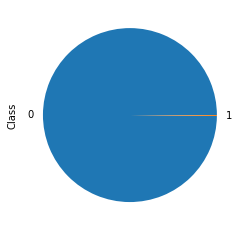

In [5]:
df['Class'].value_counts(normalize=True).plot(kind='pie')

In [6]:
y = df.pop('Class').values
X = df.values

![](images/deepnet.png)

In [7]:
model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1e-3), metrics=['categorical_accuracy'])

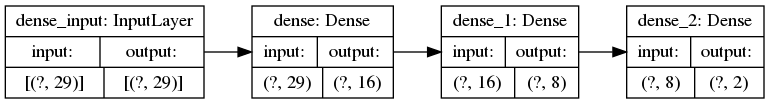

In [9]:
plot_model(model, show_shapes=True, rankdir='LR')

In [17]:
model.layers

In [18]:
layer1, layer2, layer3 = model.layers

In [26]:
l1_weight, l1_bias = layer1.weights
print(l1_weight.shape)
print(l1_bias.shape)

(29, 16)
(16,)


In [27]:
l2_weight, l2_bias = layer2.weights
print(l2_weight.shape)
print(l2_bias.shape)

(16, 8)
(8,)


In [29]:
l3_weight, l3_bias = layer3.weights
print(l3_weight.shape)
print(l3_bias.shape)

(8, 2)
(2,)


In [10]:
y = to_categorical(y)

In [11]:
history = model.fit(X, y, batch_size=128, epochs=50)

Epoch 1/50
2226/2226 [==============================] - 4s 2ms/step - loss: 0.1653 - categorical_accuracy: 0.9828
Epoch 2/50
2226/2226 [==============================] - 5s 2ms/step - loss: 0.1034 - categorical_accuracy: 0.9973
Epoch 3/50
2226/2226 [==============================] - 5s 2ms/step - loss: 0.0764 - categorical_accuracy: 0.9982
Epoch 4/50
2226/2226 [==============================] - 5s 2ms/step - loss: 0.0571 - categorical_accuracy: 0.9984
Epoch 5/50
2226/2226 [==============================] - 4s 2ms/step - loss: 0.0430 - categorical_accuracy: 0.9985
Epoch 6/50
2226/2226 [==============================] - 4s 2ms/step - loss: 0.0322 - categorical_accuracy: 0.9986
Epoch 7/50
2226/2226 [==============================] - 5s 2ms/step - loss: 0.0260 - categorical_accuracy: 0.9987
Epoch 8/50
2226/2226 [==============================] - 4s 2ms/step - loss: 0.0219 - categorical_accuracy: 0.9987
Epoch 9/50
2226/2226 [==============================] - 4s 2ms/step - loss: 0.0189 - cat

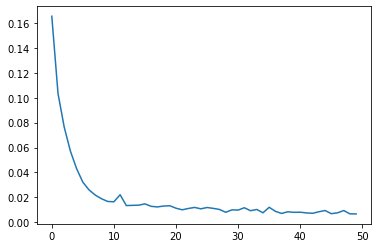

In [15]:
plt.plot(history.history['loss'], label='Loss')

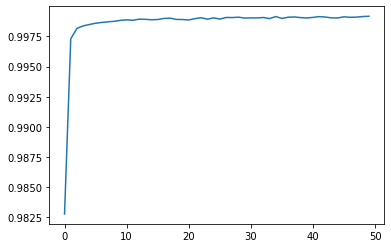

In [16]:
plt.plot(history.history['categorical_accuracy'], label='Accuracy')